In [45]:
!cd GCP-Personalized-Movie-Recommendation-System 


In [46]:
!pwd

/home/jupyter/Chiheb_Ramy


In [47]:
# Cellule 1: Imports et Configuration
import pandas as pd
import numpy as np
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os



In [58]:
PROJECT = "students-group1"
client = bigquery.Client(project=PROJECT)

In [59]:
query_movies = """
SELECT *
FROM `master-ai-cloud.MoviePlatform.movies`
LIMIT 10
"""

df_movies_sample = client.query(query_movies).to_dataframe()
print(df_movies_sample.head())
print(f"\nShape: {df_movies_sample.shape}")
print(f"\nColumns: {df_movies_sample.columns.tolist()}")
print(f"\nData types:\n{df_movies_sample.dtypes}")

   movieId                             title              genres
0   126929              Li'l Quinquin (    )  (no genres listed)
1   135460                      Pablo (2012)  (no genres listed)
2   138863  The Big Broadcast of 1936 (1935)  (no genres listed)
3   141305       Round Trip to Heaven (1992)  (no genres listed)
4   141472       The 50 Year Argument (2014)  (no genres listed)

Shape: (10, 3)

Columns: ['movieId', 'title', 'genres']

Data types:
movieId     Int64
title      object
genres     object
dtype: object


In [60]:
query_movies_stats = """
SELECT 
    COUNT(*) as total_movies,
    COUNT(DISTINCT genres) as unique_genres,
    MIN(CHAR_LENGTH(title)) as min_title_length,
    MAX(CHAR_LENGTH(title)) as max_title_length
FROM `master-ai-cloud.MoviePlatform.movies`
"""

stats_movies = client.query(query_movies_stats).to_dataframe()
print(stats_movies)

   total_movies  unique_genres  min_title_length  max_title_length
0         10329            938                 8               134


In [61]:
query_ratings = """
SELECT *
FROM `master-ai-cloud.MoviePlatform.ratings`
LIMIT 10
"""

df_ratings_sample = client.query(query_ratings).to_dataframe()
print(df_ratings_sample.head())
print(f"\nShape: {df_ratings_sample.shape}")
print(f"\nColumns: {df_ratings_sample.columns.tolist()}")


   userId  movieId  rating   timestamp
0       1      204     0.5  1217895786
1       1      256     0.5  1217895764
2       1      277     0.5  1217895772
3       1      719     0.5  1217895799
4       1    45950     0.5  1217897813

Shape: (10, 4)

Columns: ['userId', 'movieId', 'rating', 'timestamp']


In [62]:
query_ratings_stats = """
SELECT 
    COUNT(*) as total_ratings,
    COUNT(DISTINCT userId) as unique_users,
    COUNT(DISTINCT movieId) as unique_movies,
    AVG(rating) as avg_rating,
    MIN(rating) as min_rating,
    MAX(rating) as max_rating,
    STDDEV(rating) as std_rating
FROM `master-ai-cloud.MoviePlatform.ratings`
"""

stats_ratings = client.query(query_ratings_stats).to_dataframe()
print(stats_ratings)

   total_ratings  unique_users  unique_movies  avg_rating  min_rating  \
0         105339           668          10325     3.51685         0.5   

   max_rating  std_rating  
0         5.0    1.044872  


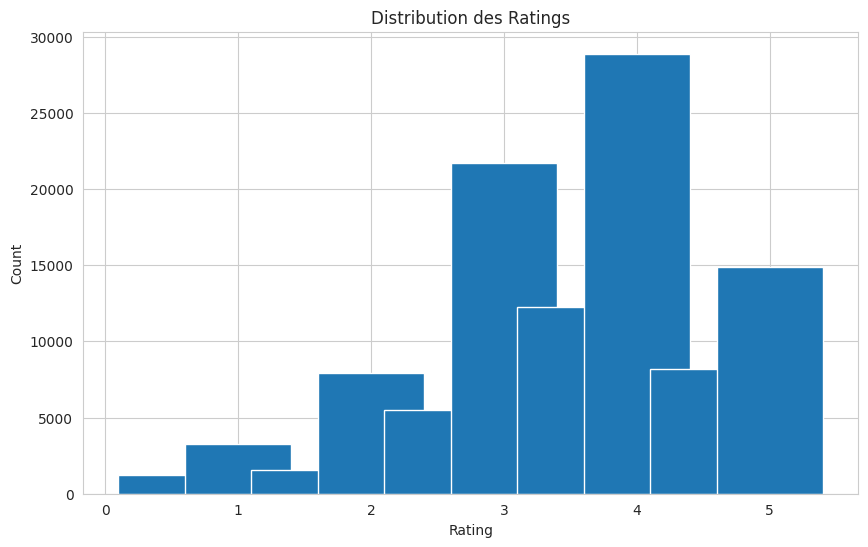

In [63]:
query_rating_dist = """
SELECT 
    rating,
    COUNT(*) as count
FROM `master-ai-cloud.MoviePlatform.ratings`
GROUP BY rating
ORDER BY rating
"""

rating_dist = client.query(query_rating_dist).to_dataframe()

plt.figure(figsize=(10, 6))
plt.bar(rating_dist['rating'], rating_dist['count'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution des Ratings')
plt.show()

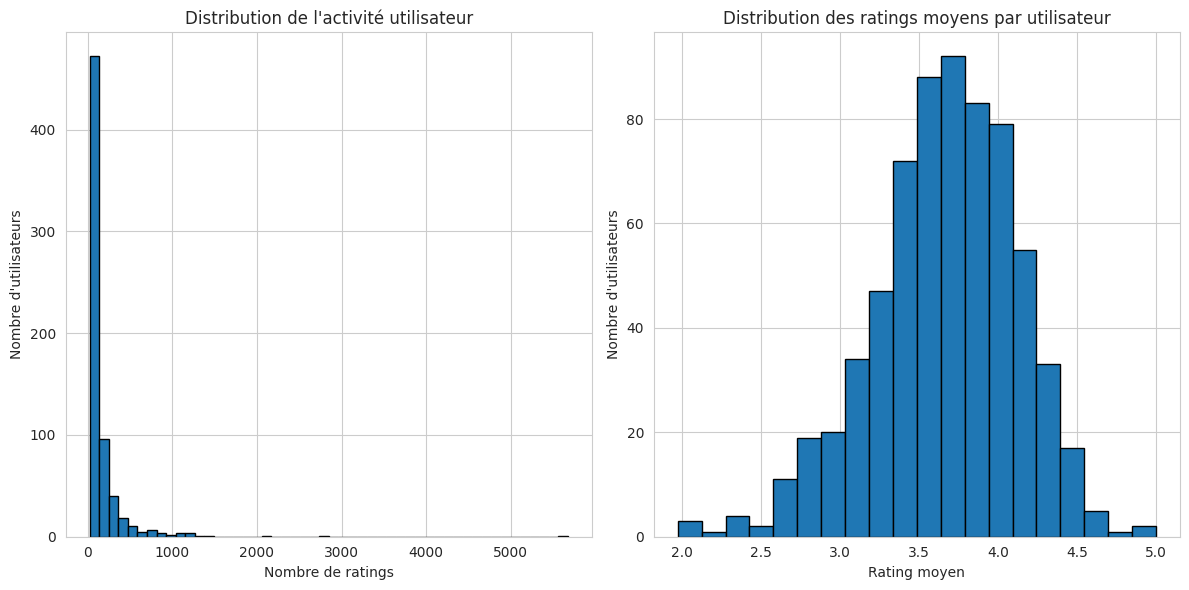

In [64]:


query_user_activity = """
SELECT 
    userId,
    COUNT(*) as num_ratings,
    AVG(rating) as avg_rating
FROM `master-ai-cloud.MoviePlatform.ratings`
GROUP BY userId
ORDER BY num_ratings DESC
LIMIT 1000
"""

user_activity = client.query(query_user_activity).to_dataframe()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(user_activity['num_ratings'], bins=50, edgecolor='black')
plt.xlabel('Nombre de ratings')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution de l\'activité utilisateur')

plt.subplot(1, 2, 2)
plt.hist(user_activity['avg_rating'], bins=20, edgecolor='black')
plt.xlabel('Rating moyen')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution des ratings moyens par utilisateur')

plt.tight_layout()
plt.show()


In [65]:
query_popular_movies = """
SELECT 
    m.movieId, 
    m.title, 
    m.genres, 
    COUNT(r.rating) as num_ratings, 
    AVG(r.rating) as avg_rating
FROM `master-ai-cloud.MoviePlatform.movies` m
JOIN `master-ai-cloud.MoviePlatform.ratings` r 
    ON m.movieId = r.movieId
GROUP BY m.movieId, m.title, m.genres
ORDER BY num_ratings DESC
LIMIT 20
"""

popular_movies = client.query(query_popular_movies).to_dataframe()
print(popular_movies)



    movieId                                              title  \
0       296                                Pulp Fiction (1994)   
1       356                                Forrest Gump (1994)   
2       318                   Shawshank Redemption, The (1994)   
3       480                               Jurassic Park (1993)   
4       593                   Silence of the Lambs, The (1991)   
5       260          Star Wars: Episode IV - A New Hope (1977)   
6      2571                                 Matrix, The (1999)   
7       589                  Terminator 2: Judgment Day (1991)   
8       110                                  Braveheart (1995)   
9       527                            Schindler's List (1993)   
10      457                               Fugitive, The (1993)   
11        1                                   Toy Story (1995)   
12       50                         Usual Suspects, The (1995)   
13     1196  Star Wars: Episode V - The Empire Strikes Back...   
14     119

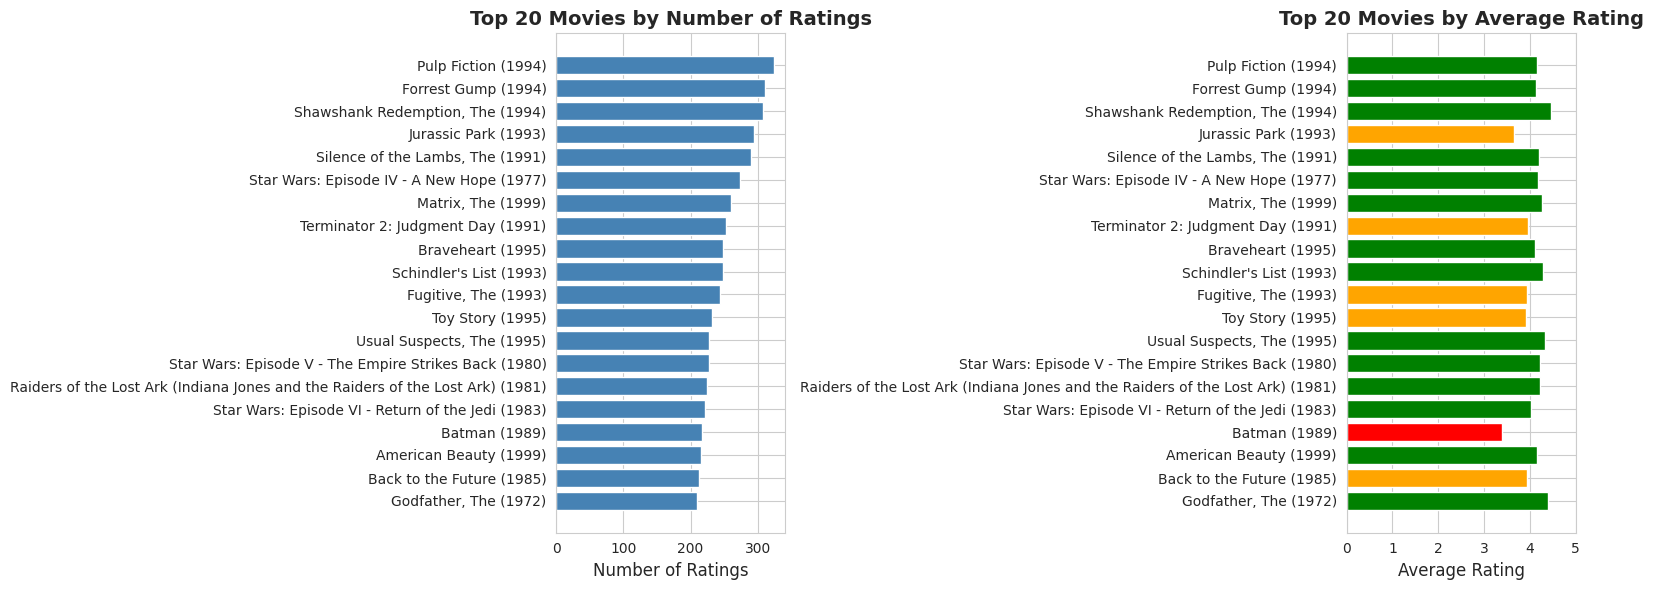

In [66]:
# Add plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Number of ratings
ax1.barh(popular_movies['title'], popular_movies['num_ratings'], color='steelblue')
ax1.set_xlabel('Number of Ratings', fontsize=12)
ax1.set_title('Top 20 Movies by Number of Ratings', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Plot 2: Average rating
colors = popular_movies['avg_rating'].apply(lambda x: 'green' if x >= 4 else 'orange' if x >= 3.5 else 'red')
ax2.barh(popular_movies['title'], popular_movies['avg_rating'], color=colors)
ax2.set_xlabel('Average Rating', fontsize=12)
ax2.set_title('Top 20 Movies by Average Rating', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 5)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()